In [1]:
%pip list

Package                      Version
---------------------------- ---------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.5.0
certifi                      2024.8.30
charset-normalizer           3.4.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.7
decorator                    5.1.1
efficientnet                 1.0.0
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.54.1
gast                         0.4.0
google-auth                  2.35.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.67.0
h5py                         3.12.1
idna                         3.10
image-classifiers            1.0.0
imageio                      2.36.0
imp

In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
dataset_root_folder = "DL_SatelliteImagery"
dataset_folder = "DubaiDataset"

In [4]:
image_patch_size = 256
minmax = MinMaxScaler()

In [5]:
for path, subdirs, files in os.walk(dataset_folder):
    dir_name = path.split(os.path.sep)[-1]
    print(dir_name)
    if dir_name == 'images':
        images = os.listdir(path)
        #print(images)
        for i, image_name in enumerate(images):
            if image_name.endswith('jpg'):
             print(image_name)

DubaiDataset
Tile 1
images
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
masks
Tile 2
images
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
masks
Tile 3
images
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
masks
Tile 4
images
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
masks
Tile 5
images
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
masks
Tile 6
images
image_part_001.jpg

In [6]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_folder}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmax.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [7]:
image_dataset

[array([[[0.78823529, 0.76470588, 0.74509804],
         [0.88235294, 0.85882353, 0.83921569],
         [0.94509804, 0.90980392, 0.89411765],
         ...,
         [0.89411765, 0.85882353, 0.82352941],
         [0.85882353, 0.83137255, 0.79607843],
         [0.87843137, 0.85098039, 0.81568627]],
 
        [[0.88627451, 0.8627451 , 0.84313725],
         [0.99607843, 0.97254902, 0.95294118],
         [1.        , 1.        , 0.98431373],
         ...,
         [0.93333333, 0.89803922, 0.8627451 ],
         [0.92941176, 0.90196078, 0.86666667],
         [0.95294118, 0.91764706, 0.88235294]],
 
        [[0.97254902, 0.94509804, 0.93333333],
         [1.        , 0.98823529, 0.97647059],
         [1.        , 1.        , 0.98431373],
         ...,
         [0.93333333, 0.89411765, 0.86666667],
         [0.92156863, 0.89411765, 0.85882353],
         [0.90196078, 0.86666667, 0.83137255]],
 
        ...,
 
        [[0.88235294, 0.8627451 , 0.86666667],
         [0.81960784, 0.80392157, 0.8    

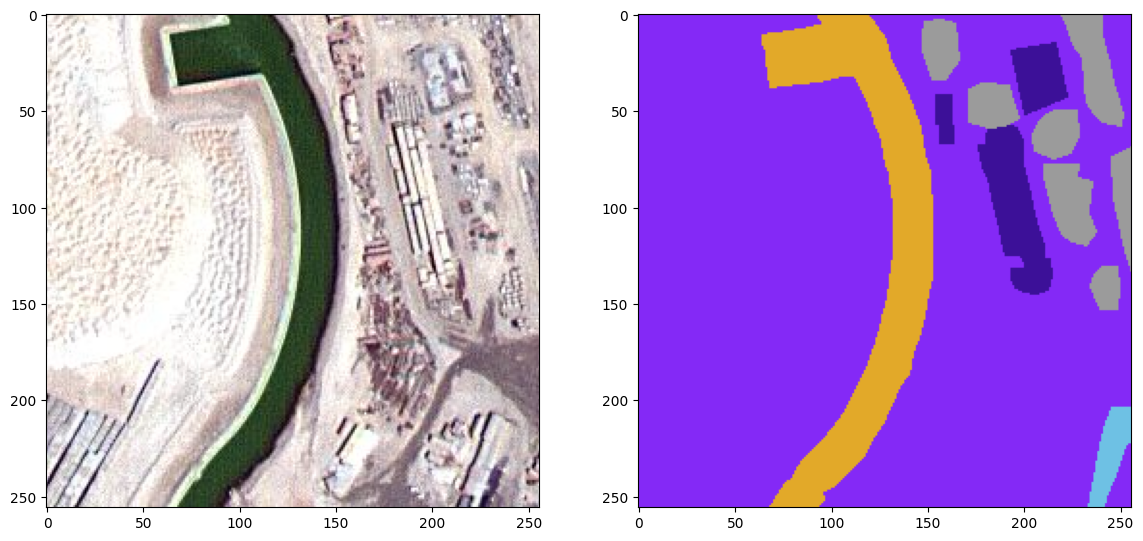

In [8]:
# rendering the images

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[0])
plt.subplot(122)
plt.imshow(mask_dataset[0])

In [9]:
# Processing Labels (Converting Hex values to RGB)
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [10]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [11]:
label = individual_patched_mask

In [12]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [13]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [14]:
labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

Total unique labels based on masks:  [0 1 2 3 4 5]


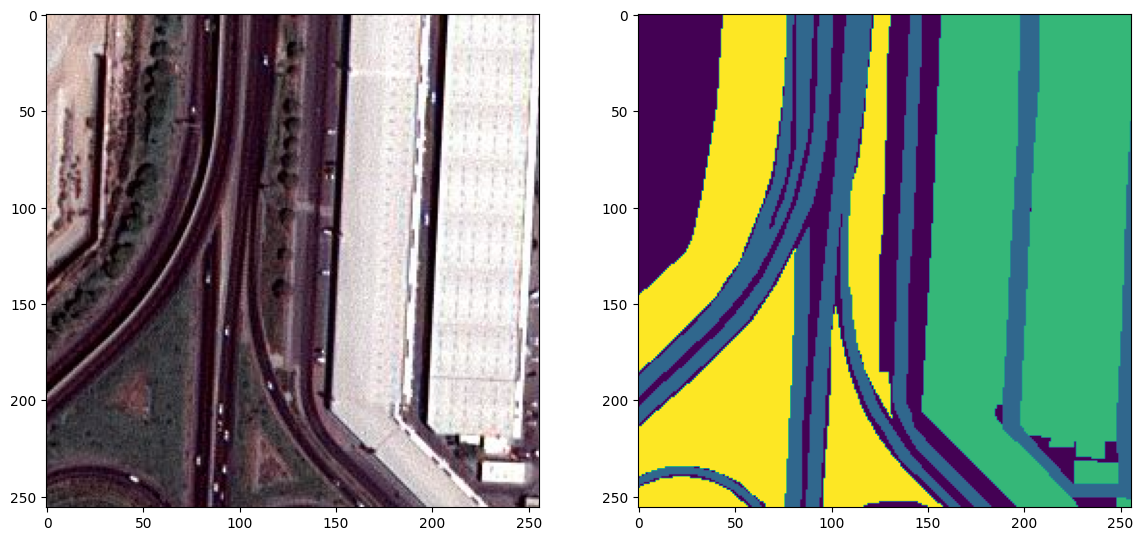

In [15]:
print("Total unique labels based on masks: ",format(np.unique(labels)))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[50])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[50][:,:,0])

In [16]:
total_classes = len(np.unique(labels))


In [17]:
import tensorflow as tf

# List available physical devices (GPUs)
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Set memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth set for GPUs.")
    except RuntimeError as e:
        # Memory growth must be set at the start
        print(f"Error: {e}")


Memory growth set for GPUs.


In [18]:
from tensorflow.keras.utils import to_categorical 
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)
master_training_dataset = image_dataset
from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)


In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [21]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [22]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate, BatchNormalization, Dropout, Lambda, Flatten

In [23]:
from tensorflow.keras import backend as K


In [24]:
def jaccard_coef(y_true, y_pred):

    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)

    intersection = K.sum(y_true_flatten * y_pred_flatten)
    final_coef = (intersection + 1.0) / (K.sum(y_true_flatten)+K.sum(y_pred_flatten)-intersection +1.0)
    # TP + FP - FN
    return final_coef

In [25]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [26]:
metrics = ["accuracy", jaccard_coef]


In [27]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)

In [28]:
model = get_deep_learning_model()

In [29]:
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [30]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights = weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

In [31]:
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8) #0.333
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True, gpu_options=gpu_options))

model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [32]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [33]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs available: {gpus}")
else:
    print("No GPU available. Training will run on CPU.")

GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [34]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [35]:
tf.keras.backend.clear_session()
K.clear_session()

In [36]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/100
51/51 [==============================] - 81s 999ms/step - loss: 0.9998 - accuracy: 0.5586 - jaccard_coef: 0.2597 - val_loss: 0.9933 - val_accuracy: 0.6253 - val_jaccard_coef: 0.2675
Epoch 2/100
51/51 [==============================] - 41s 801ms/step - loss: 0.9814 - accuracy: 0.6678 - jaccard_coef: 0.3572 - val_loss: 0.9732 - val_accuracy: 0.6621 - val_jaccard_coef: 0.3991
Epoch 3/100
51/51 [==============================] - 41s 805ms/step - loss: 0.9667 - accuracy: 0.7055 - jaccard_coef: 0.4266 - val_loss: 0.9661 - val_accuracy: 0.6967 - val_jaccard_coef: 0.4254
Epoch 4/100
51/51 [==============================] - 41s 801ms/step - loss: 0.9586 - accuracy: 0.7227 - jaccard_coef: 0.4705 - val_loss: 0.9754 - val_accuracy: 0.6658 - val_jaccard_coef: 0.4377
Epoch 5/100
51/51 [==============================] - 41s 802ms/step - loss: 0.9541 - accuracy: 0.7398 - jaccard_coef: 0.4968 - val_loss: 0.9691 - val_accuracy: 0.6775 - val_jaccard_coef: 0.4618
Epoch 6/100
51/51 [===========

In [37]:
history_1 = model_history


In [38]:
history_1.history


{'loss': [0.9997597932815552,
  0.9814392924308777,
  0.9666643142700195,
  0.9586486220359802,
  0.954074501991272,
  0.9472255110740662,
  0.9414752125740051,
  0.9355117082595825,
  0.9330518841743469,
  0.9287595152854919,
  0.9300506711006165,
  0.9292080402374268,
  0.9247176647186279,
  0.923732578754425,
  0.9216907620429993,
  0.9205012321472168,
  0.9237825870513916,
  0.9185321927070618,
  0.9171968102455139,
  0.9161180853843689,
  0.9160719513893127,
  0.9181668162345886,
  0.9145926833152771,
  0.9122662544250488,
  0.911632239818573,
  0.9099993705749512,
  0.9087855815887451,
  0.9084694385528564,
  0.9079034924507141,
  0.9107033610343933,
  0.9099300503730774,
  0.9061798453330994,
  0.9052947759628296,
  0.9044381976127625,
  0.905308187007904,
  0.9067100882530212,
  0.9049307107925415,
  0.9031671285629272,
  0.9033982753753662,
  0.9024039506912231,
  0.8994889855384827,
  0.9043883681297302,
  0.9045897126197815,
  0.8994477987289429,
  0.9010003209114075,
  0.89

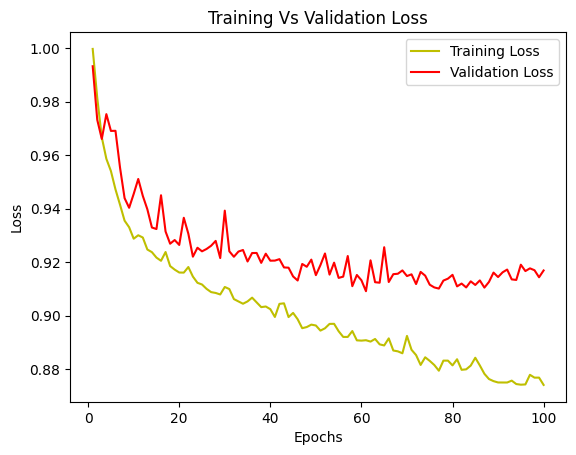

In [39]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

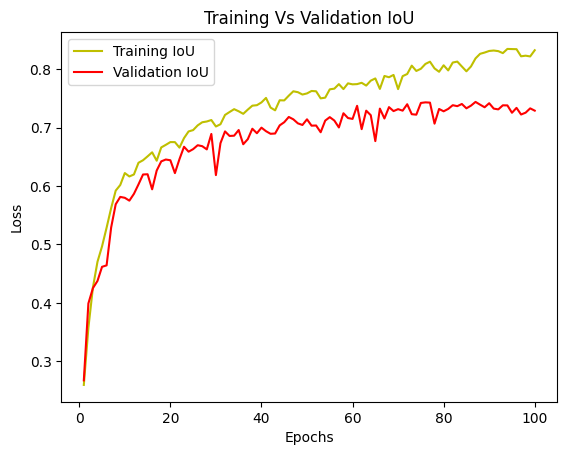

In [40]:
jaccard_coef = history_1.history['jaccard_coef']
val_jaccard_coef = history_1.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [41]:
model_history.params


{'verbose': 1, 'epochs': 100, 'steps': 51}

In [42]:
y_pred = model.predict(X_test)


5/5 [==============================] - 8s 256ms/step


In [43]:
len(y_pred)


142

In [44]:
y_pred

array([[[[1.20916748e-02, 6.66048825e-01, 9.06293541e-02,
          1.30703434e-01, 9.97974798e-02, 7.29259162e-04],
         [1.98187167e-03, 7.83819377e-01, 5.03344834e-02,
          1.16215214e-01, 4.75983657e-02, 5.07605946e-05],
         [1.48400024e-03, 7.47484028e-01, 5.94058931e-02,
          1.40011504e-01, 5.15729040e-02, 4.16692674e-05],
         ...,
         [1.51917140e-03, 5.60350299e-01, 2.57974833e-01,
          1.60422981e-01, 1.96723118e-02, 6.04552079e-05],
         [1.09769218e-03, 5.61054468e-01, 2.84501344e-01,
          1.35987192e-01, 1.72722451e-02, 8.69899231e-05],
         [3.58719681e-03, 5.32698810e-01, 2.63272583e-01,
          1.62922055e-01, 3.66217606e-02, 8.97540653e-04]],

        [[2.01900769e-03, 8.21765661e-01, 4.42292057e-02,
          8.55901614e-02, 4.63238806e-02, 7.20082317e-05],
         [1.27089559e-04, 8.94730270e-01, 1.51591720e-02,
          7.26546645e-02, 1.73267201e-02, 2.06086133e-06],
         [1.10315705e-04, 8.41801226e-01, 1.9229

In [45]:
y_pred_argmax = np.argmax(y_pred, axis=3)


In [46]:
y_test_argmax = np.argmax(y_test, axis=3)


In [47]:
import random
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 2s 2s/step


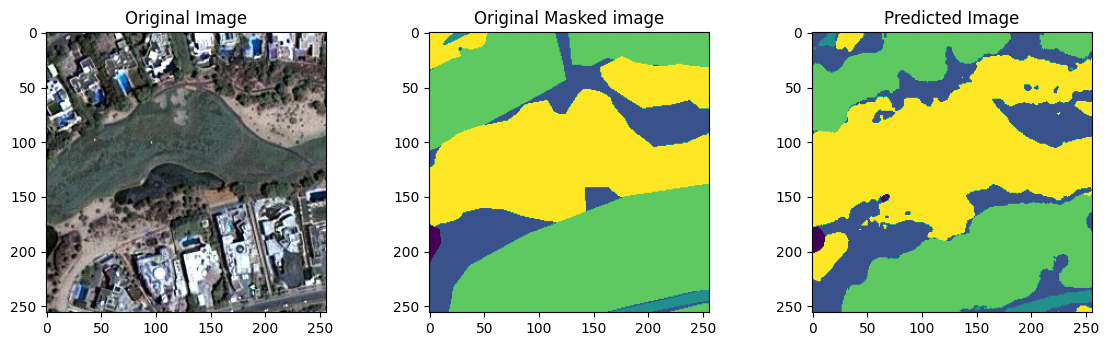

In [48]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [49]:
model.save("satellite_segmentation.h5")


In [51]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [55]:
from keras.models import load_model
saved_model = load_model('satellite_segmentation.h5',
                         custom_objects=({'dice_loss_plus_1focal_loss': total_loss, 
                                          'jaccard_coef': jaccard_coef}))

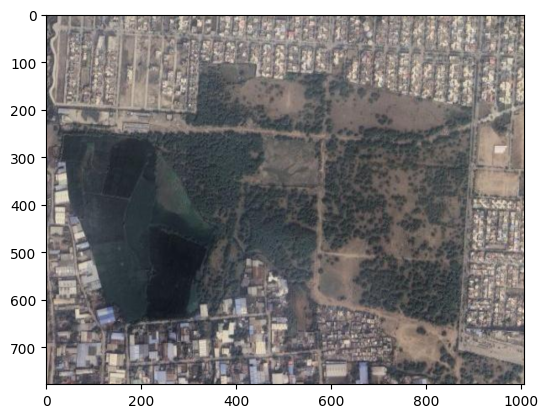

In [56]:
plt.imshow(Image.open('minal_residency.png'))


In [61]:
image = Image.open('minal_residency.png').convert('RGB')
image = image.resize((256,256))
image = np.array(image)
image = np.expand_dims(image, 0)

In [62]:
prediction = saved_model.predict(image)


1/1 [==============================] - 1s 619ms/step


In [63]:
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

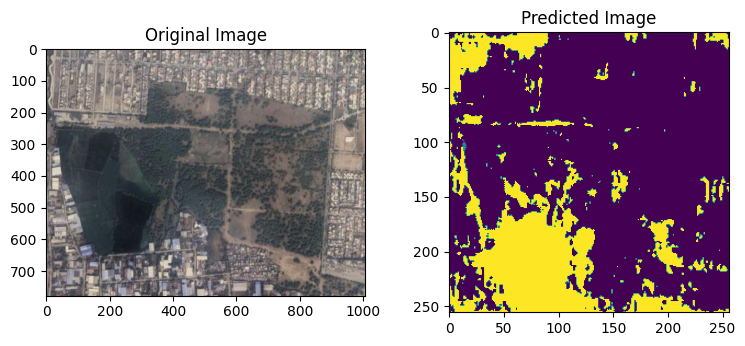

In [64]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('minal_residency.png'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [65]:
%pip install keract


Note: you may need to restart the kernel to use updated packages.


In [66]:
import keract as ke
activations = ke.get_activations(saved_model, image, nodes_to_evaluate=None, output_format='simple', auto_compile=True)


In [ ]:
ke.display_activations(activations, cmap='viridis', save=True, directory='activations')


input_1 (1, 256, 256, 3) 
conv2d (1, 256, 256, 16) 
dropout (1, 256, 256, 16) 
conv2d_1 (1, 256, 256, 16) 
max_pooling2d (1, 128, 128, 16) 
conv2d_2 (1, 128, 128, 32) 
dropout_1 (1, 128, 128, 32) 
conv2d_3 (1, 128, 128, 32) 
max_pooling2d_1 (1, 64, 64, 32) 
conv2d_4 (1, 64, 64, 64) 
dropout_2 (1, 64, 64, 64) 
conv2d_5 (1, 64, 64, 64) 
max_pooling2d_2 (1, 32, 32, 64) 
conv2d_6 (1, 32, 32, 128) 
dropout_3 (1, 32, 32, 128) 
conv2d_7 (1, 32, 32, 128) 
max_pooling2d_3 (1, 16, 16, 128) 
conv2d_8 (1, 16, 16, 256) 
dropout_4 (1, 16, 16, 256) 
conv2d_9 (1, 16, 16, 256) 
conv2d_transpose (1, 32, 32, 128) 
concatenate (1, 32, 32, 256) 
conv2d_10 (1, 32, 32, 128) 
dropout_5 (1, 32, 32, 128) 
conv2d_11 (1, 32, 32, 128) 
conv2d_transpose_1 (1, 64, 64, 64) 
concatenate_1 (1, 64, 64, 128) 
conv2d_12 (1, 64, 64, 64) 
dropout_6 (1, 64, 64, 64) 
conv2d_13 (1, 64, 64, 64) 
conv2d_transpose_2 (1, 128, 128, 32) 
concatenate_2 (1, 128, 128, 64) 
conv2d_14 (1, 128, 128, 32) 


In [2]:
import matplotlib.pyplot as plt
plt.imshow(Image.open('activations/0_input_1.png'))


NameError: name 'Image' is not defined